In [3]:
# load necessary libraries

import warnings
warnings.simplefilter("ignore")

import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels    
import statsmodels.api as sm
from pandas.tools.plotting import autocorrelation_plot

filename = 'international-airline-passengers.csv'

In [4]:
# ---------------------------------
# set plot attributes
# ---------------------------------
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 10
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = 10, 7

In [5]:
# ---------------------------------
# Load Dataset
# ---------------------------------
dataset = pd.read_csv(filename, 
                      header=0, parse_dates=[0],
                      index_col=0, squeeze=True)
# print dataset
print()
print(dataset.shape)
print(dataset.head(25))


(144,)
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
Name: Passenger, dtype: int64


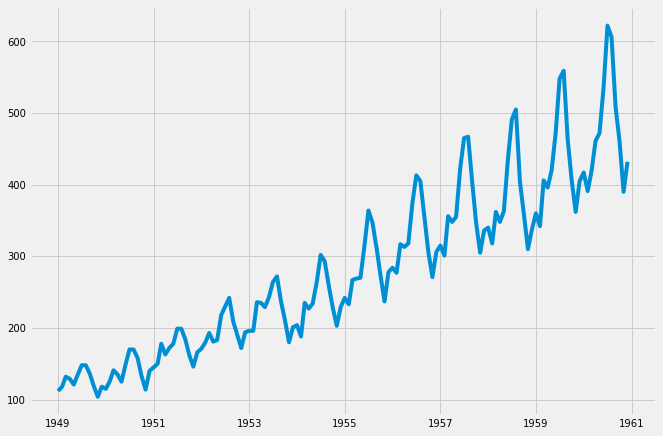

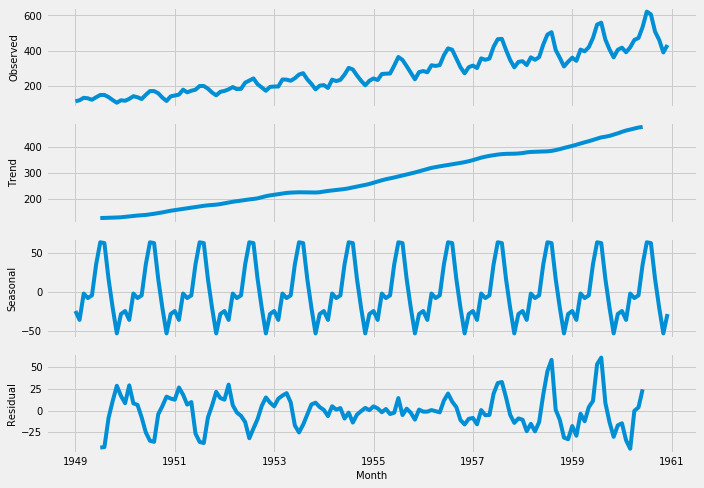

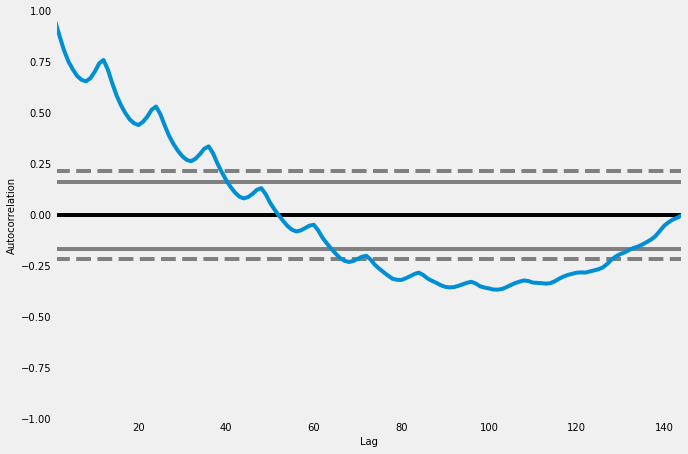

In [6]:
# ---------------------------------
# Visualise Time Series Dataset
# ---------------------------------
# Plot Dataset
plt.plot(dataset)
plt.show()

print('\n\n\n')

# Decompose diffentent Time Series elements e.g. trand, seasonality, Residual ... ...
decomposition = sm.tsa.seasonal_decompose(dataset, model='additive')
decomposition.plot()
plt.show()

print('\n\n\n')

# Auto-correlation plot
autocorrelation_plot(dataset)
plt.show()

In [8]:
# -------------------------------------------------
# Grid Search for parameters - SARIMAX(p,d,q) Model 
# -------------------------------------------------
warnings.simplefilter("ignore")

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q)) # it replaces loop for iteration
print(pdq)
    
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print(seasonal_pdq)

params = []
params_seasonal = []
AICs = []

print()
for param in pdq:
    for param_seasonal in seasonal_pdq:
            try:
                    mod = sm.tsa.statespace.SARIMAX(dataset,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
                    results = mod.fit()
                    
                    print()
                    print("Parameter values for p, d and q {}x{}".format(param, param_seasonal))
                    print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
                    print()
                    
                    if(np.isnan(results.aic)):
                        pass
                    else:
                        params.append(param)
                        params_seasonal.append(param_seasonal)
                        AICs.append(results.aic)
            except:
                    continue

# Get the index of minimum AIC from the list
index_min_aic = np.argmin(AICs)

# Best parameter sets (p, d, q) for ARIMA
print(params[index_min_aic])
print(params_seasonal[index_min_aic])
print(AICs[index_min_aic])

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


Parameter values for p, d and q (0, 0, 0)x(0, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2044.4329486427587


Parameter values for p, d and q (0, 0, 0)x(0, 0, 1, 12)
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1887.1493782738871


Parameter values for p, d and q (0, 0, 0)x(0, 1, 0, 12)
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1315.9211929474204


Parameter values for p, d and q (0, 0, 0)x(0, 1, 1, 12)
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1156.291490150852


Parameter values for p, d and q (0, 0, 0)x(1, 0, 0, 12)
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1118.6259190717344


Parameter values for p, d and q (0, 0, 0)x(1, 0, 1, 12)
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1107.2562043238856


Parameter values for p, d and q (0, 0, 0)x(1, 1, 0, 12)
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1109.2437994445115


Param

                                 Statespace Model Results                                 
Dep. Variable:                          Passenger   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -456.160
Date:                            Wed, 26 Dec 2018   AIC                            920.319
Time:                                    23:51:49   BIC                            931.368
Sample:                                01-01-1949   HQIC                           924.805
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3351      0.076     -4.403      0.000      -0.484      -0.186
ar.S.L12      -0.5597      0.285   

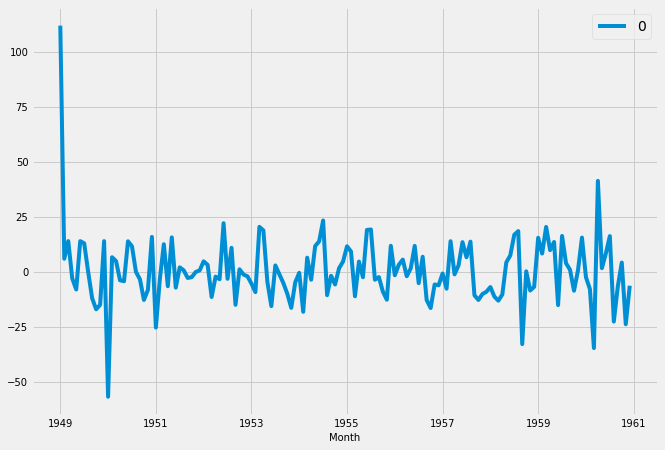

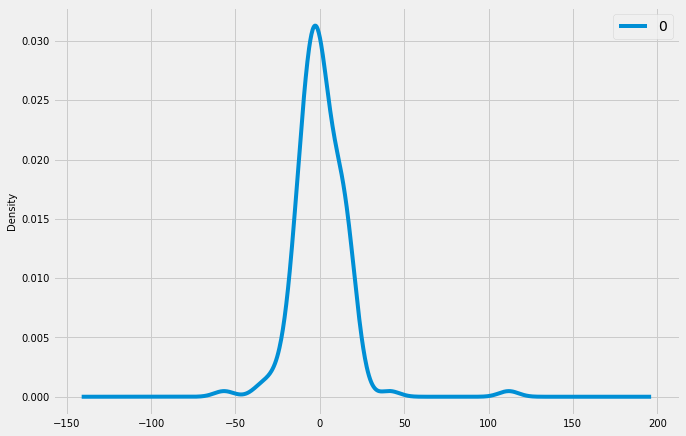

                0
count  144.000000
mean     0.579362
std     15.750900
min    -56.772356
25%     -7.689807
50%     -1.095006
75%      8.616813
max    112.000000


In [9]:
    # -------------------------------------------------
    # Fit ARIMA(p,d,q) Model with the best parameter sets
    # -------------------------------------------------
    model = sm.tsa.statespace.SARIMAX(dataset,
                                      order=params[index_min_aic],
                                      seasonal_order=params_seasonal[index_min_aic],
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
    results = model.fit()

    # Get summary of the model
    print(results.summary())
    print(results.summary().tables[1])
    print(results.summary().tables[2])

    # plot residual errors
    residuals = pd.DataFrame(results.resid)
    residuals.plot()
    plt.show()
    residuals.plot(kind='kde')
    plt.show()
    
    print(residuals.describe())

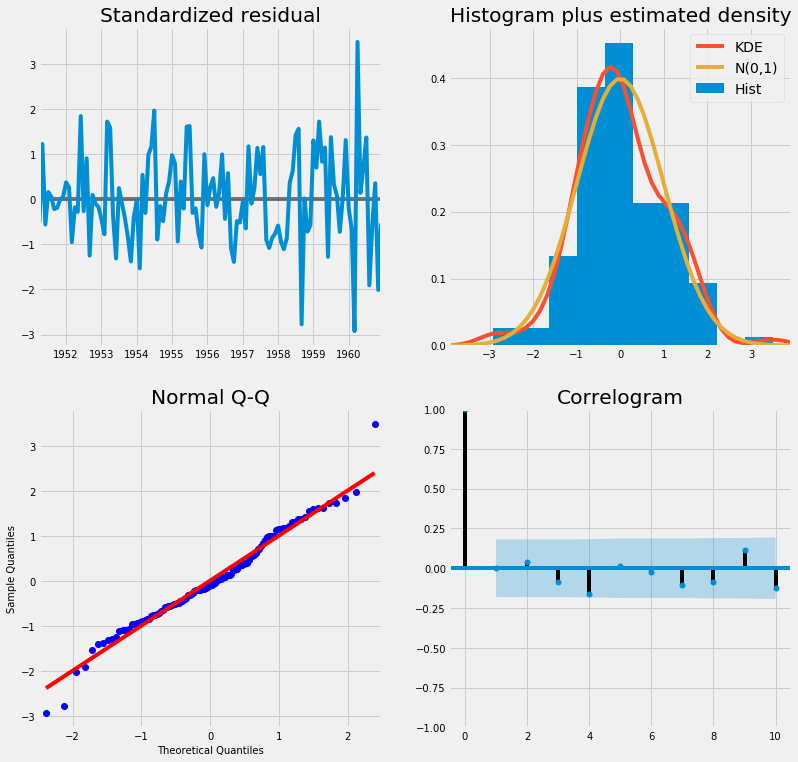

In [11]:
# -------------------------------------------------------------
# Visualise model's behaviourusing built-in diagnostics
# ------------------------------------------------------------- 
results.plot_diagnostics(figsize=(12, 12))
plt.show()

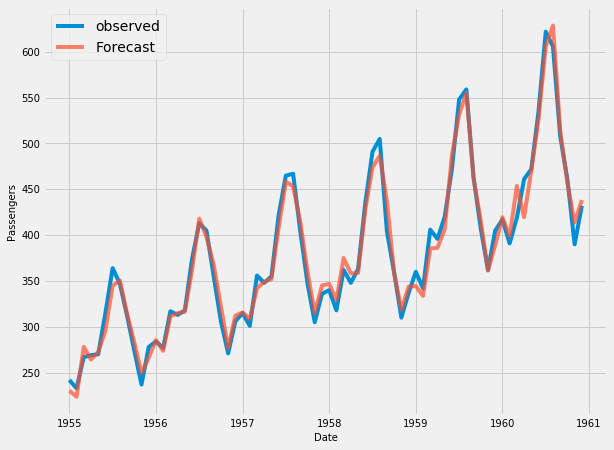

In [12]:
# ------------------------------------------------
# Validating forecasts from the fitted model
# ------------------------------------------------
pred    = results.predict(start=pd.to_datetime('1955-01'))
actual  = dataset['1955-01':].plot(label='observed')
    
pred.plot(ax=actual, label='Forecast', alpha=.7, figsize=(9, 7))

actual.set_xlabel('Date')
actual.set_ylabel('Passengers')
plt.legend()
plt.show()

In [13]:
# -------------------------------------------------------
# Evaluating the model using different KPIs or metrics
# -------------------------------------------------------
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
y_forecasted    = results.predict(start=pd.to_datetime('1955-01'))
y_truth         = dataset['1955-01':]

coefficient_of_dermination = r2_score(y_truth, y_forecasted)
print("R squared: ", coefficient_of_dermination)

mae = mean_absolute_error(y_truth, y_forecasted)
print('The Mean Absolute Error of our forecasts is {}'.format(round(mae, 2)))

mse = mean_squared_error(y_truth, y_forecasted)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

msle = mean_squared_log_error(y_truth, y_forecasted)
print('The Mean Squared Log Error of our forecasts is {}'.format(round(msle, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

R squared:  0.9771857523183379
The Mean Absolute Error of our forecasts is 10.29
The Mean Squared Error of our forecasts is 168.09
The Mean Squared Log Error of our forecasts is 0.0
The Root Mean Squared Error of our forecasts is 12.97


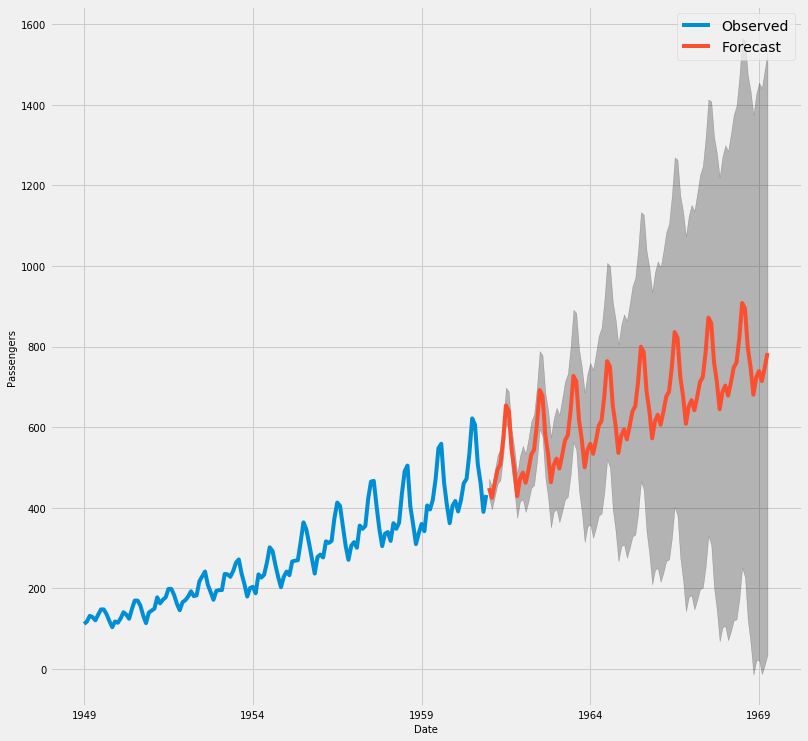

In [16]:
# -----------------------------------------------
# Forecasts (Prediction) and Visualisation
# -----------------------------------------------
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = dataset.plot(label='Observed', figsize=(12, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()